In [1]:
import pandas as pd 
import torch 
import numpy as np

from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import umap 

from sklearn.metrics import roc_auc_score

/home/teddy/miniconda3/envs/tkgdti/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
res = torch.load('/home/teddy/local/TKG-DTI/output/tkge/complex2/c67afb84-c7d5-418c-9435-3a36b838a623/test_metrics.pt')
res

/tmp/ipykernel_3597/726059135.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  res = torch.load('/home/teddy/local/TKG-DTI/output/tkge/complex2/c67afb84-c7d5-418c-9435-3a

{'optim': 'adam',
 'lr': 0.001,
 'wd': 1e-06,
 'channels': 1024,
 'batch_size': 10000,
 'n_epochs': 1,
 'lr_scheduler': False,
 'dropout': 0.0,
 'remove_relation_idx': 5,
 'MRR': 0.002578819680711524,
 'Top1': 0.0,
 'Top3': 0.0,
 'Top10': 0.0030864197530864196,
 'Top100': 0.04938271604938271,
 'avg_AUC': 0.827853546932961,
 'avg_AP': 0.003763397292628939,
 'avg_Brier': 0.6843800022971068,
 'ECE': 0.8256652600506753,
 'uid': UUID('c67afb84-c7d5-418c-9435-3a36b838a623')}

In [2]:
model = torch.load('../output/tmp/f987d62b-36b7-4d72-896b-dba2a7abc353/best_model.pt')
preds = pd.read_csv('../output/tmp/f987d62b-36b7-4d72-896b-dba2a7abc353/predictions.csv')
preds.head()

/tmp/ipykernel_17791/3764099940.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('../output/tmp/f987d62b-36b7-4d72-896b-dba2a7abc353/best_model.pt')
/h

,drug,protein,score,prob,drug_name,prot_name,train,valid,test,negatives
0,0,0,0.000015,0.000015,AAKJLRGGTJKAMG-UHFFFAOYSA-N,A,False,False,False,True
1,0,1,0.000010,0.000010,AAKJLRGGTJKAMG-UHFFFAOYSA-N,A1BG,False,False,False,True
2,0,2,0.000006,0.000006,AAKJLRGGTJKAMG-UHFFFAOYSA-N,A1CF,False,False,False,True
3,0,3,0.000066,0.000066,AAKJLRGGTJKAMG-UHFFFAOYSA-N,A2M,False,False,False,True
4,0,4,0.000005,0.000005,AAKJLRGGTJKAMG-UHFFFAOYSA-N,A3GALT2,False,False,False,True


In [3]:
y = preds[lambda x: x.negatives | x.test].test.values
yhat = preds[lambda x: x.negatives | x.test].prob.values
auroc = roc_auc_score(y, yhat) 
auroc

0.9365504015458729

In [24]:
preds.valid.sum()

21

In [25]:
preds.test.sum()

43

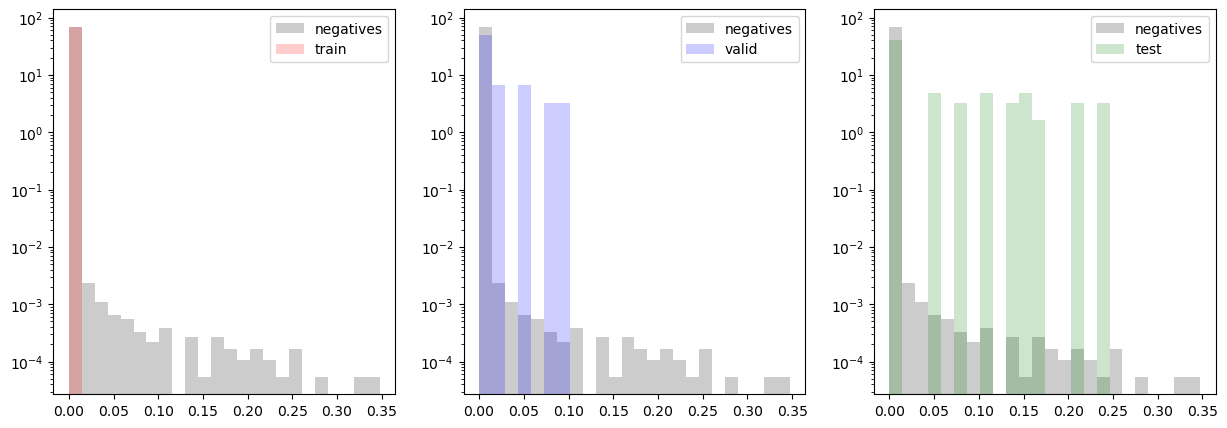

In [8]:
_bins = np.linspace(0,preds.prob.max(), 25)

f,axes = plt.subplots(1,3, figsize=(15,5))

# NOTE: train is not representative here bc the drug->target edge was not removed during prediction 
axes[0].hist(preds[lambda x: x.negatives].prob.values, color='k', label='negatives', alpha=0.2, density=True, bins=_bins) 
axes[0].hist(preds[lambda x: x.train].prob.values, color='r', label='train', alpha=0.2, density=True, bins=_bins) 
axes[0].set_yscale('log')

axes[1].hist(preds[lambda x: x.negatives].prob.values, color='k', label='negatives', alpha=0.2, density=True, bins=_bins)
axes[1].hist(preds[lambda x: x.valid].prob.values, color='b', label='valid', alpha=0.2, density=True, bins=_bins)
axes[1].set_yscale('log')

axes[2].hist(preds[lambda x: x.negatives].prob.values, color='k', label='negatives', alpha=0.2, density=True, bins=_bins)
axes[2].hist(preds[lambda x: x.test].prob.values, color='g', label='test', alpha=0.2, density=True, bins=_bins)
axes[2].set_yscale('log')

axes[0].legend()
axes[1].legend()
axes[2].legend()
plt.show()

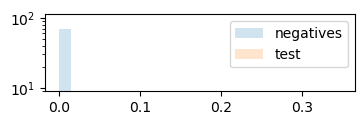

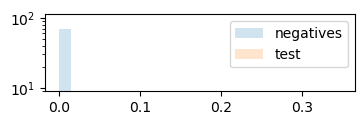

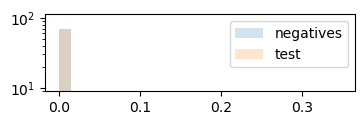

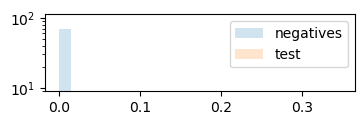

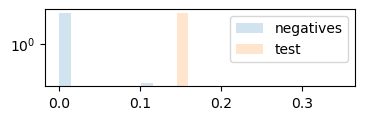

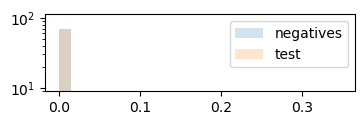

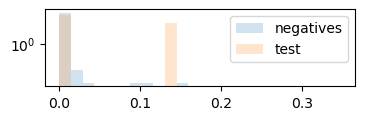

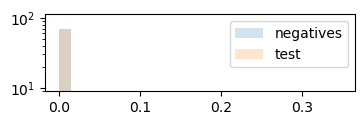

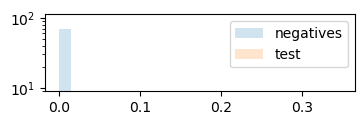

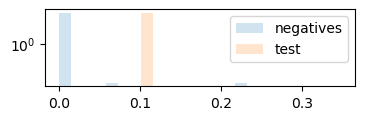

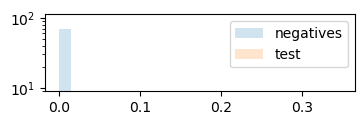

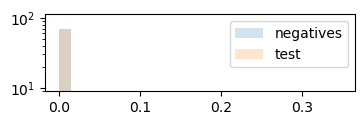

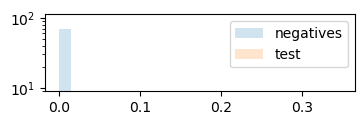

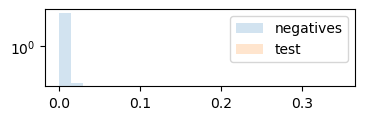

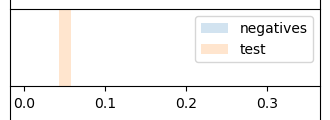

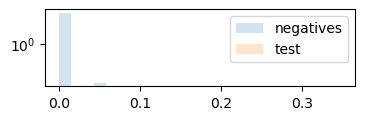

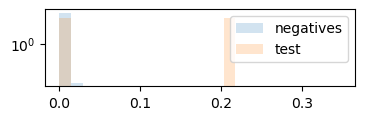

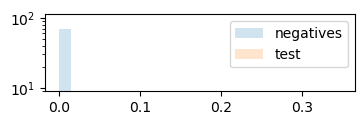

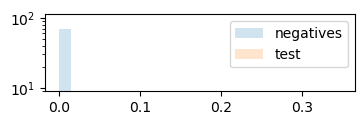

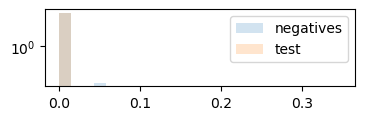

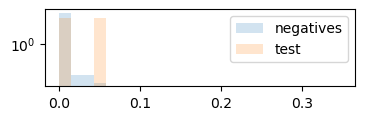

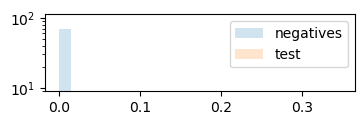

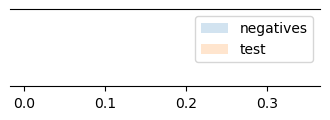

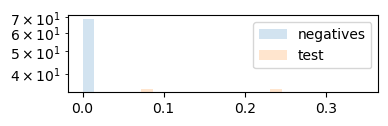

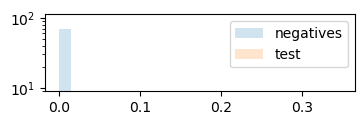

In [17]:
for drug in preds.drug.unique()[:25]:
    plt.figure(figsize=(4,1)) 
    plt.hist(preds[lambda x: (x.drug == drug) & (x.negatives)].prob.values, bins=_bins, alpha=0.2, label='negatives', density=True)
    plt.hist(preds[lambda x: (x.drug == drug) & (x.test)].prob.values, bins=_bins, alpha=0.2,  label='test', density=True)
    plt.yscale('log')
    plt.legend()
    plt.show()


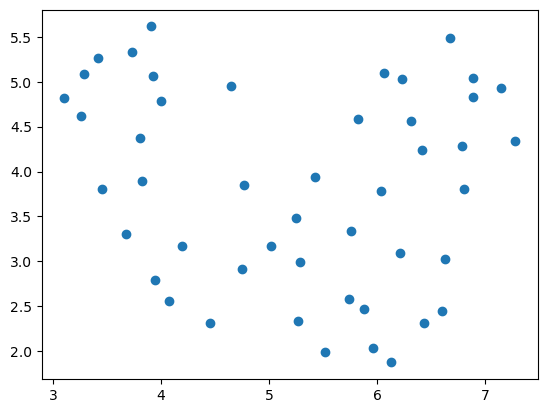

In [23]:
z = model.edge_embedding.weight.detach().cpu().numpy() #torch.cat([e.weight for e in model.edge_embedding], dim=1).detach().cpu().numpy()

pca = PCA(n_components=2)
pca.fit(z)
z_pca = pca.transform(z)

print('variance explained:', pca.explained_variance_ratio_)

plt.figure() 
plt.scatter(z_pca[:, 0], z_pca[:, 1])
plt.show()

In [70]:
model

GNN(
  (convs): ModuleList(
    (0-4): 5 x GATConv(12, 12, heads=1)
  )
  (norm): LayerNorm(12, affine=False, mode=node)
  (edge_embedding): ParameterList(
      (0): Object of type: Embedding
      (1): Object of type: Embedding
      (2): Object of type: Embedding
      (3): Object of type: Embedding
      (4): Object of type: Embedding
    (0): Embedding(10, 4)
    (1): Embedding(10, 4)
    (2): Embedding(10, 4)
    (3): Embedding(10, 4)
    (4): Embedding(10, 4)
  )
  (nonlin): ELU(alpha=1.0)
  (mlp): Sequential(
    (0): Linear(in_features=12, out_features=100, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [ ]:
similarity = np.dot(z, z.T)
pd.DataFrame(similarity, columns=)

,0,1,2,3,4,5,6,7,8,9
0,21.017996,3.131621,-7.632500,8.419474,-3.295847,-2.297662,-1.259527,2.073725,-3.029898,3.594250
1,3.131621,28.754110,6.472686,-0.593168,-7.062277,3.688724,-2.387775,4.295218,0.874992,-4.285287
2,-7.632500,6.472686,18.766926,-10.614187,-4.057479,-1.501907,-4.671206,9.063771,-3.388204,-4.893436
3,8.419474,-0.593168,-10.614187,33.497074,12.066599,-0.321806,-5.708894,-7.421788,-3.828407,4.198737
4,-3.295847,-7.062277,-4.057479,12.066599,20.967623,0.474196,0.231260,-5.737985,0.056812,3.973603
5,-2.297662,3.688724,-1.501907,-0.321806,0.474196,45.055099,-2.845417,-5.454775,5.540814,-0.218789
6,-1.259527,-2.387775,-4.671206,-5.708894,0.231260,-2.845417,14.750678,-5.024884,1.770473,4.561841
7,2.073725,4.295218,9.063771,-7.421788,-5.737985,-5.454775,-5.024884,18.753193,-3.439374,-6.821043
8,-3.029898,0.874992,-3.388204,-3.828407,0.056812,5.540814,1.770473,-3.439374,18.484165,2.186879
9,3.594250,-4.285287,-4.893436,4.198737,3.973603,-0.218789,4.561841,-6.821043,2.186879,15.370812


In [33]:
data = torch.load('../data/biokg/processed/Data.pt', weights_only=False)
data2= torch.load('../data/tkg/processed/FOLD_0/Data.pt', weights_only=False)
data3 = torch.load('/home/teddy/local/TKG-DTI/data/HeteroA/processed/FOLD_0/Data.pt', weights_only=False)

In [36]:
data3['edge_reltype']

{('drug', 'drug->association->disease', 'disease'): array([0., 0., 0., ..., 0., 0., 0.]), ('protein', 'protein->interaction->protein', 'protein'): array([1., 1., 1., ..., 1., 1., 1.]), ('protein', 'protein->association->disease', 'disease'): array([2., 2., 2., ..., 2., 2., 2.]), ('drug', 'drug->interaction->drug', 'drug'): array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,


In [20]:
[x for x in data.edge_index_dict.keys() if (x[0] == 'drug') & (x[-1] == 'protein')]

[('drug', 'drug-protein', 'protein')]

In [21]:
[x for x in data.edge_index_dict.keys() if (x[0] == 'protein') & (x[-1] == 'drug')]

[]

In [32]:
data.node_names_dict

KeyError: "Tried to collect 'node_names' but did not find any occurrences of it in any node and/or edge type"

In [29]:
rel2int = {k:v[0].item() for k,v in data.edge_reltype.items()}
rel2int[('drug', 'drug-protein', 'protein')]

40

In [15]:
data['edge_reltype']

{('disease',
  'disease-protein',
  'protein'): array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]),
 ('drug',
  'drug-disease',
  'disease'): array([[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]),
 ('drug',
  'drug-drug_acquired_metabolic_disease',
  'drug'): array([[2],
        [2],
        [2],
        ...,
        [2],
        [2],
        [2]]),
 ('drug',
  'drug-drug_bacterial_infectious_disease',
  'drug'): array([[3],
        [3],
        [3],
        ...,
        [3],
        [3],
        [3]]),
 ('drug',
  'drug-drug_benign_neoplasm',
  'drug'): array([[4],
        [4],
        [4],
        ...,
        [4],
        [4],
        [4]]),
 ('drug',
  'drug-drug_cancer',
  'drug'): array([[5],
        [5],
        [5],
        ...,
        [5],
        [5],
        [5]]),
 ('drug',
  'drug-drug_cardiovascular_system_disease',
  'drug'): array([[6],
        [6],
        [6],
        ...,
        [6],
     

In [8]:
data2.edge_reltype

{('dbgap_subject',
  'mut_missense_variant_deleterious_fwd',
  'gene'): array([0, 0, 0, ..., 0, 0, 0]),
 ('dbgap_subject',
  'mut_frameshift_variant__fwd',
  'gene'): array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 

In [11]:
tmp = [] 
for key, edge_index in data.edge_index_dict.items(): 
    
    tmp.append(','.join(key) + ',' + str(edge_index.size(1))) 

_ = [print(x) for x in np.sort(tmp)]
len(tmp)

dbgap_subject,high_expr_fwd,gene,179126
dbgap_subject,low_expr_fwd,gene,180964
dbgap_subject,low_expr_unnorm_fwd,gene,355229
dbgap_subject,mut_frameshift_variant__fwd,gene,511
dbgap_subject,mut_missense_variant_deleterious_fwd,gene,1330
dbgap_subject,mut_missense_variant_tolerated_fwd,gene,804
dbgap_subject,mut_stop_gained__fwd,gene,233
dbgap_subject,resistant_to_fwd,drug,5707
dbgap_subject,sensitive_to_fwd,drug,5745
disease,associates_rev,drug,30291
drug,associates_fwd,disease,30291
drug,resistant_to_rev,dbgap_subject,5707
drug,sensitive_to_rev,dbgap_subject,5745
drug,targets,gene,341
gene,high_expr_rev,dbgap_subject,179126
gene,inhibits_fwd,gene,40701
gene,inhibits_rev,gene,40701
gene,interacts_fwd,gene,130061
gene,interacts_rev,gene,130061
gene,isin_fwd,pathway,135792
gene,low_expr_rev,dbgap_subject,180964
gene,low_expr_unnorm_rev,dbgap_subject,355229
gene,mut_frameshift_variant__rev,dbgap_subject,511
gene,mut_missense_variant_deleterious_rev,dbgap_subject,1330
gene,mut_missense_var

29